Game of Life design

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random

universe1[0+-1,0+-1]=universe1[-1,-1]
universe1[0+-1,0+0]=universe1[-1,0]
universe1[0+-1,0+1]=universe1[-1,1]
universe1[0+0,0+-1]=universe1[0,-1]
universe1[0+0,0+0]=universe1[0,0]
universe1[0+0,0+1]=universe1[0,1]
universe1[0+1,0+-1]=universe1[1,-1]
universe1[0+1,0+0]=universe1[1,0]
universe1[0+1,0+1]=universe1[1,1]
0


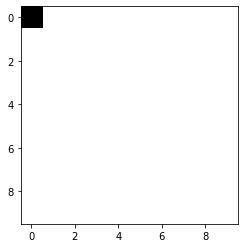

In [147]:
#Test 
universe1=np.zeros((10,10))
universe1[0,0]=1
cel_ind1=(0,0)
n_n1=0
l0=10
l1 =10

plt.imshow(universe1, cmap='Greys')
for i in [-1,0,1]:
    for j in [-1,0,1]:
        if(i!=0) or (j!=0):
            if cel_ind1[0]+i==l0:
                i=-cel_ind1[0]
            if cel_ind1[1]+j==l1:
                j=-cel_ind1[1]
         #  print(f"i is {i} and j is {j}")
            if universe1[cel_ind1[0]+i,cel_ind1[1]+j]==1:
                print(f"universe1[{cel_ind1[0]}+{i},{cel_ind1[1]}+{j}]=1")
                n_n1 += 1
        print(f"universe1[{cel_ind1[0]}+{i},{cel_ind1[0]}+{j}]=universe1[{cel_ind1[0]+i},{cel_ind1[1]+j}]")       

print(n_n1)
            

In [83]:
universe=np.zeros((100,100))
for i in [random.randint(30,70) for _ in range(20)]:
    for j in [random.randint(40,60) for _ in range(20)]:
        universe[i,j]=1

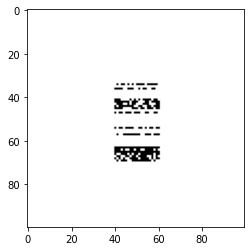

In [84]:
plt.imshow(universe,cmap='Greys')

In [85]:
    def find_neighbours(cell_ind:tuple,universe:np.array):
        num_neighbours=0
        l0=universe.shape[0]
        l1=universe.shape[1]
        for i in [-1,0,1]:
            for j in [-1,0,1]:
                if (i!=0) or (j!=0):
                    if cell_ind[0]+i==l0:
                        i=-cell_ind[0]
                    if cell_ind[1]+j==l1:
                        j=-cell_ind[1]
                    if universe[cell_ind[0]+i, cell_ind[1]+j]==1:
                        num_neighbours += 1
        return num_neighbours
    

In [86]:
cell_ind=(5,15)
find_neighbours(cell_ind,universe)

0

In [133]:
def pass_time(universe):
    num_neighbours_map=np.zeros(universe.shape)
    for i in range(universe.shape[0]):
        for j in range(universe.shape[1]):
            num_neighbours_map[i,j]=find_neighbours((i,j),universe)
            
    new_universe=np.zeros(universe.shape)
    survivors=(universe==1)&((num_neighbours_map==2)|(num_neighbours_map==3))
    zombie=(universe==0)&(num_neighbours_map==3)
    new_universe =(survivors == 1) | (zombie == 1)
    
    return new_universe

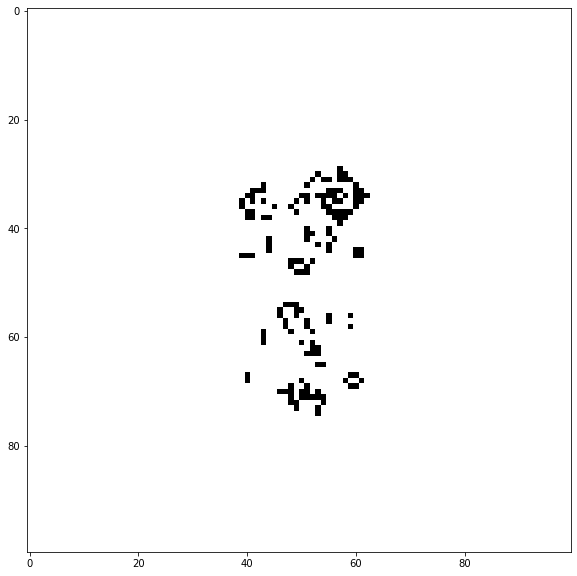

In [144]:
from IPython.display import clear_output
from time import sleep

num_turns=10
new_universe=universe
for _ in range(num_turns):
    new_universe=pass_time(new_universe)
    plt.figure(figsize=(10,10))
    plt.imshow(new_universe,cmap='Greys')
    plt.show()
    sleep(1)
    clear_output(wait=True)